In [ ]:
#Importing required libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_curve, f1_score, auc, roc_auc_score, precision_recall_curve,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

DATA LOADING

In [ ]:
dataset=pd.read_csv('CarPrice_Assignment.csv')
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

DATA CLEANING

In [ ]:
w_missing = dataset.isna().sum()
w_missing

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data = dataset.drop_duplicates()
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


DATA TRANSFORMATION

In [ ]:
le = LabelEncoder()
data['CarName'] = le.fit_transform(data['CarName'])
data['fueltype'] = le.fit_transform(data['fueltype'])
data['aspiration'] = le.fit_transform(data['aspiration'])
data['doornumber'] = le.fit_transform(data['doornumber'])
data['carbody'] = le.fit_transform(data['carbody'])
data['drivewheel'] = le.fit_transform(data['drivewheel'])
data['enginelocation'] = le.fit_transform(data['enginelocation'])
data['fuelsystem'] = le.fit_transform(data['fuelsystem'])
data['cylindernumber'] = le.fit_transform(data['cylindernumber'])
data['enginetype'] = le.fit_transform(data['enginetype'])

In [ ]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,9,1,0,1,3,1,0,99.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,5,1,0,0,3,1,0,105.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,7,1,0,0,4,1,0,105.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,6,1,1,0,3,1,0,105.8,...,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,8,1,1,1,2,0,0,99.5,...,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


FEATURE ENGINEERING

In [ ]:
data['average_mpg'] = (data['citympg'] + data['highwaympg']) / 2


In [ ]:
data = data.drop(['citympg', 'highwaympg','car_ID'], axis=1)


In [ ]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,average_mpg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,13495.0,24.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,16500.0,24.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,16500.0,22.5
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,13950.0,27.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,16845.0,25.5
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19045.0,22.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,21485.0,20.5
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,3,145,3,3.01,3.40,23.0,106,4800,22470.0,26.5


DATA SCALING

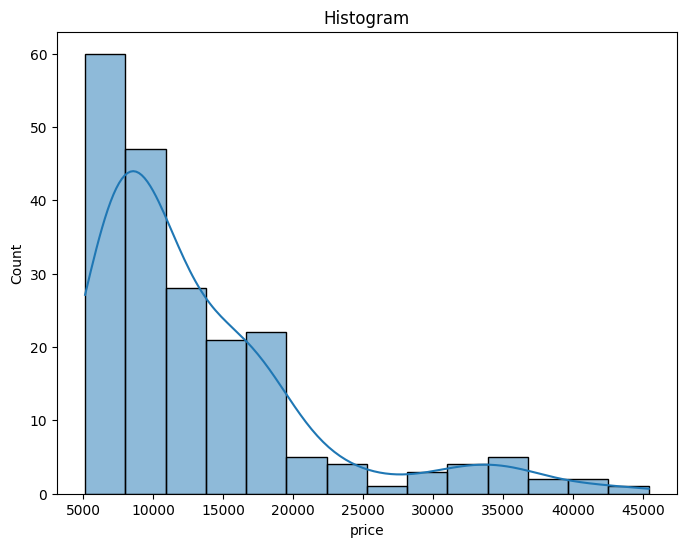

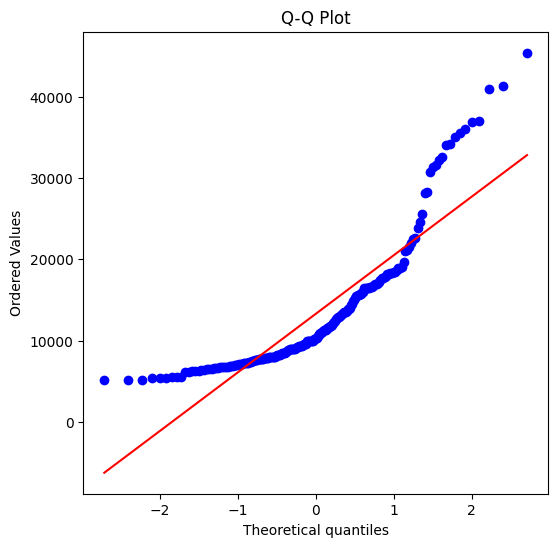

Shapiro-Wilk Test:
Test statistic: 0.8006653189659119
p-value: 1.8491637681397307e-15
The dataset is not normally distributed.

Kolmogorov-Smirnov Test:
Test statistic: 1.0
p-value: 0.0
The dataset is not normally distributed.

Anderson-Darling Test:
Test statistic: 12.340562863167605
Critical values: [0.565 0.644 0.772 0.901 1.072]
Significance levels: [15.  10.   5.   2.5  1. ]
The dataset is not normally distributed.

Normality Test:
Test statistic: 77.37514013383584
p-value: 1.578344501676757e-17
The dataset is not normally distributed.


In [ ]:
#Checking if our dataset is normally distributed
target = data['price']

# Visual inspection: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True)
plt.title('Histogram')
plt.show()

# Visual inspection: Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(target, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk test
statistic, p_value = stats.shapiro(target)
alpha = 0.05  # Significance level

print("Shapiro-Wilk Test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = stats.kstest(target, 'norm')

print("\nKolmogorov-Smirnov Test:")
print("Test statistic:", ks_statistic)
print("p-value:", ks_p_value)

if ks_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Anderson-Darling test
ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(target, dist='norm')

print("\nAnderson-Darling Test:")
print("Test statistic:", ad_statistic)
print("Critical values:", ad_critical_values)
print("Significance levels:", ad_significance_levels)

if ad_statistic < ad_critical_values[2]:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Normality test using normaltest
normaltest_statistic, normaltest_p_value = stats.normaltest(target)

print("\nNormality Test:")
print("Test statistic:", normaltest_statistic)
print("p-value:", normaltest_p_value)

if normaltest_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

In [ ]:
scaler=MinMaxScaler()
columns_to_normalize = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','average_mpg','enginetype']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,average_mpg
0,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,...,0.333333,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,13495.0,0.246575
1,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,...,0.333333,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,16500.0,0.246575
2,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,0.449254,...,0.500000,0.343396,0.714286,0.100000,0.666667,0.12500,0.441667,0.346939,16500.0,0.205479
3,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,0.529851,...,0.333333,0.181132,0.714286,0.464286,0.633333,0.18750,0.225000,0.551020,13950.0,0.328767
4,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,0.529851,...,0.166667,0.283019,0.714286,0.464286,0.633333,0.06250,0.279167,0.551020,17450.0,0.136986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.952055,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,0.711940,...,0.333333,0.301887,0.714286,0.885714,0.514286,0.15625,0.275000,0.510204,16845.0,0.287671
201,0.2,0.945205,1.0,1.0,0.0,0.75,1.0,0.0,0.655977,0.711940,...,0.333333,0.301887,0.714286,0.885714,0.514286,0.10625,0.466667,0.469388,19045.0,0.191781
202,0.2,0.958904,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,0.711940,...,0.500000,0.422642,0.714286,0.742857,0.380952,0.11250,0.358333,0.551020,21485.0,0.150685
203,0.2,0.972603,0.0,1.0,0.0,0.75,1.0,0.0,0.655977,0.711940,...,0.500000,0.316981,0.428571,0.335714,0.633333,1.00000,0.241667,0.265306,22470.0,0.315068


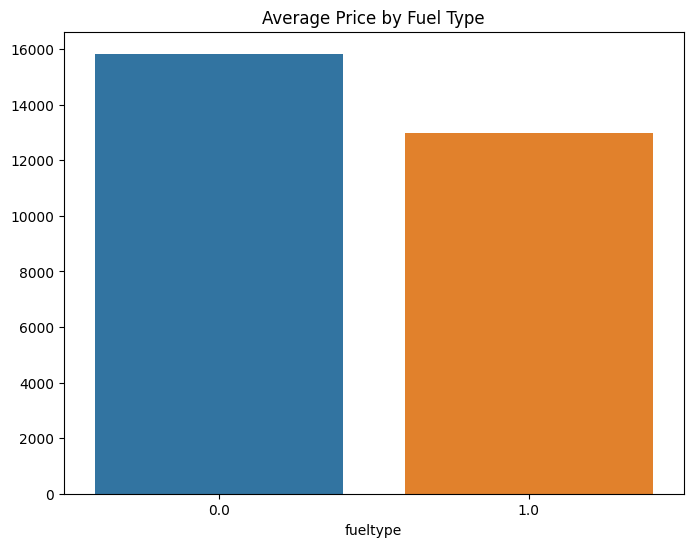

In [ ]:


# Bar Plot for Average Price by Fuel Type
plt.figure(figsize=(8, 6))
avg_price_by_fueltype = data.groupby('fueltype')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_fueltype.index, y=avg_price_by_fueltype.values)
plt.title("Average Price by Fuel Type")
plt.xticks(rotation=0)
plt.show()


In [ ]:
sns.set(style="whitegrid")

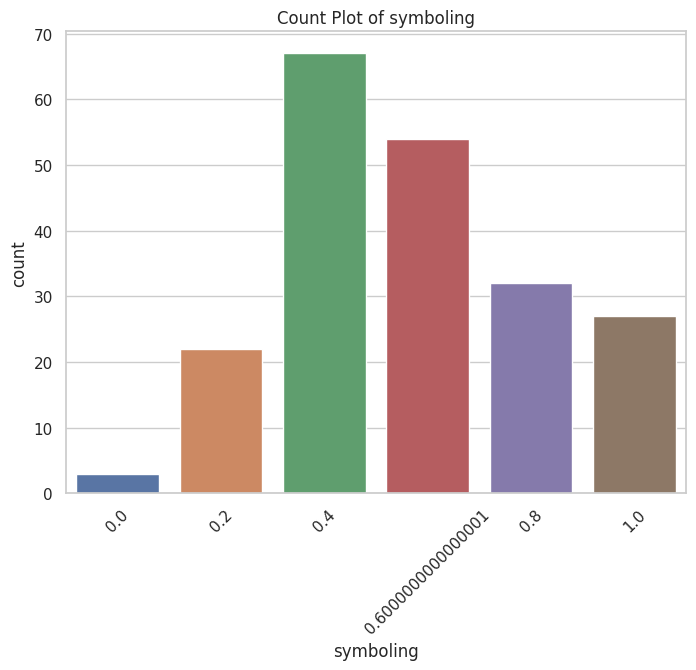

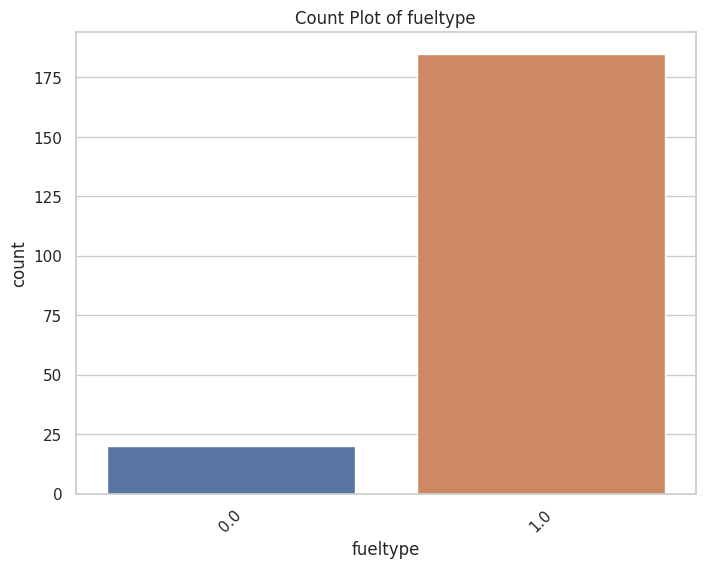

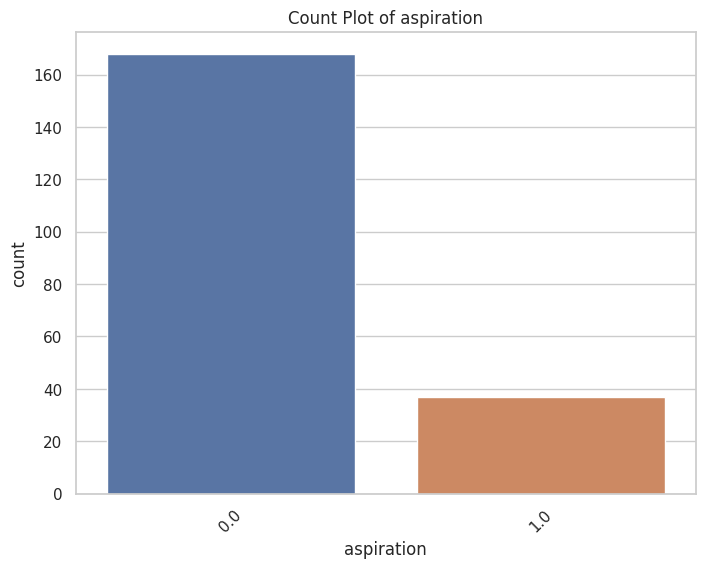

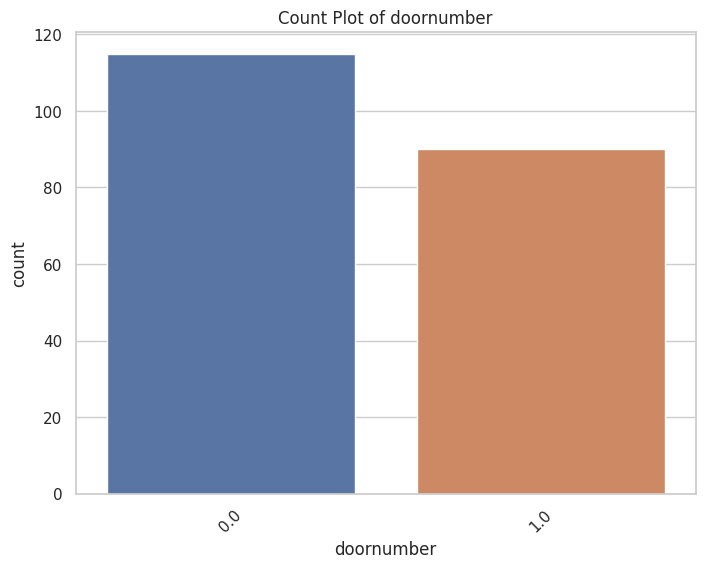

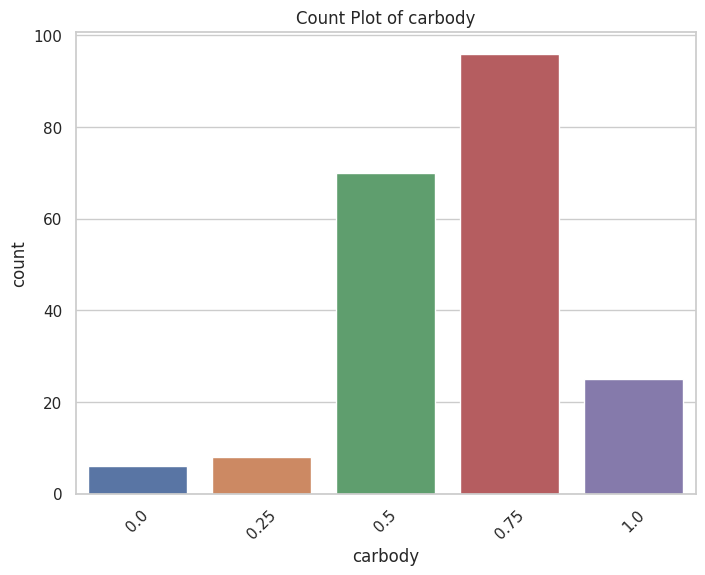

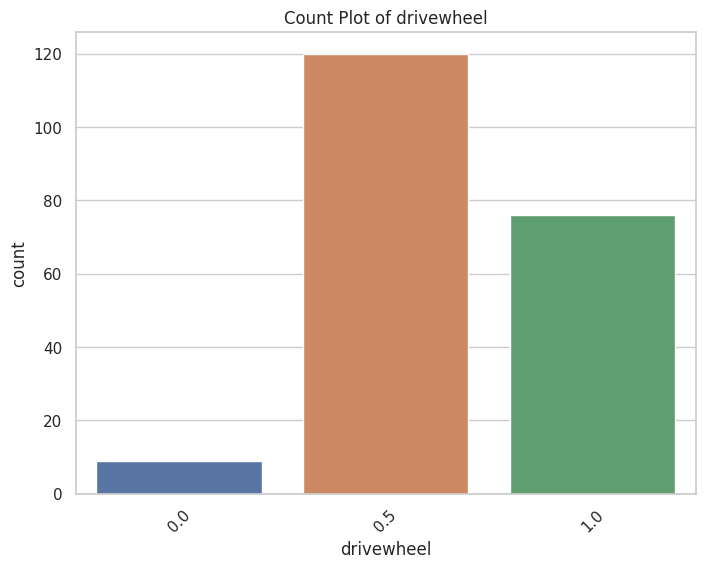

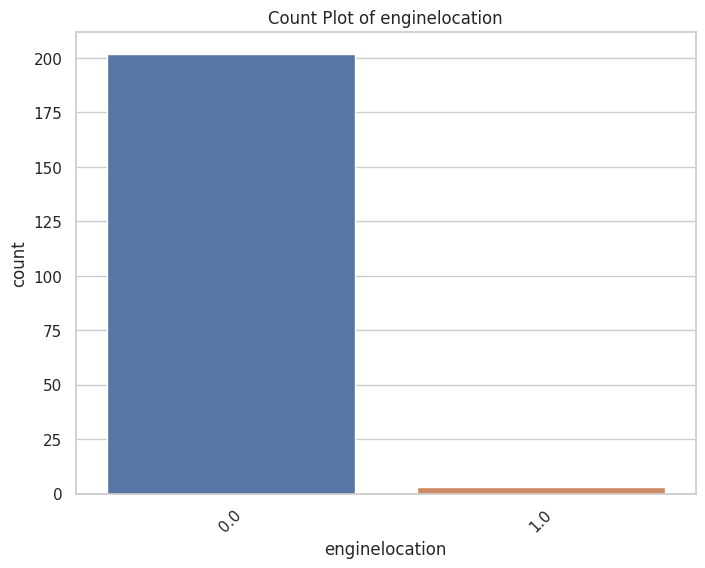

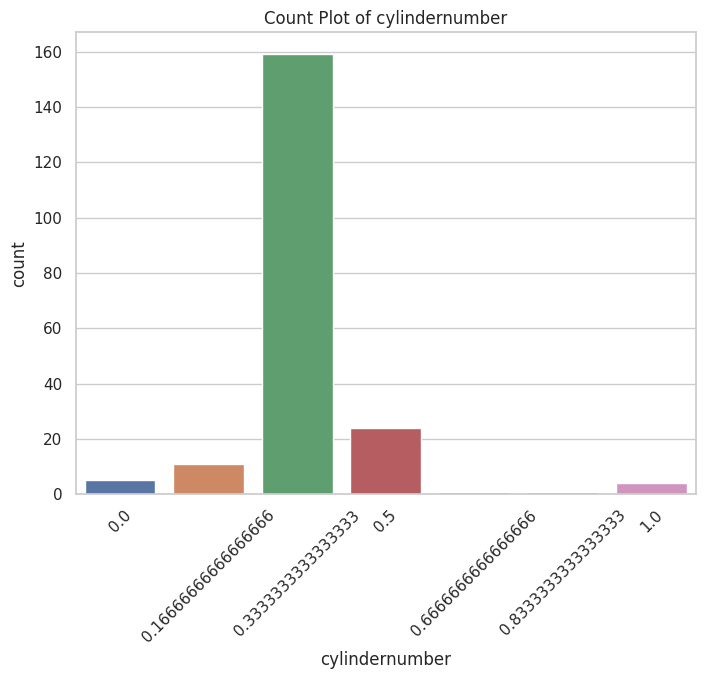

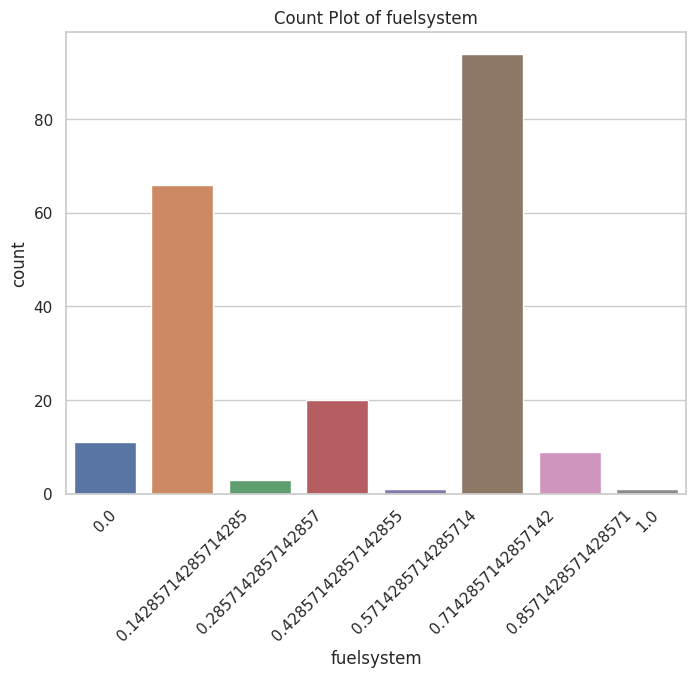

In [ ]:
# Count Plot for Categorical Columns
categorical_columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'cylindernumber', 'fuelsystem']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()

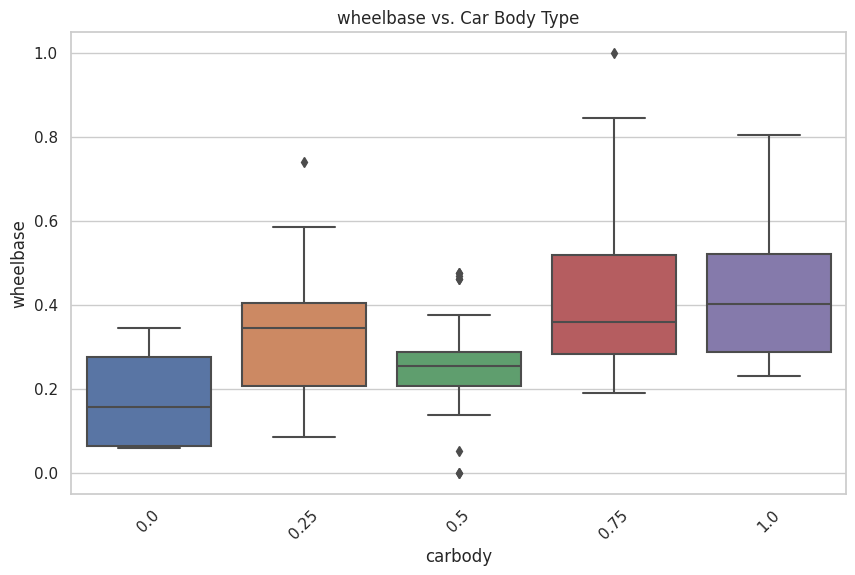

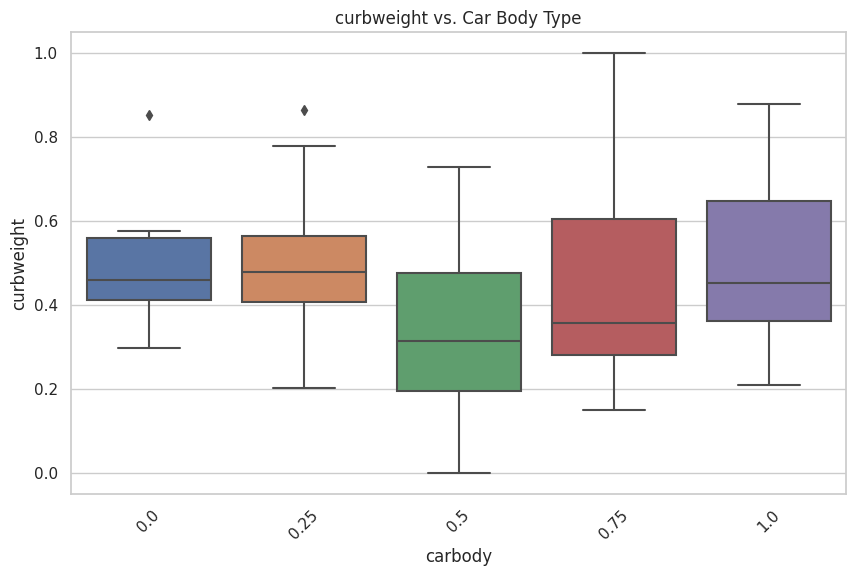

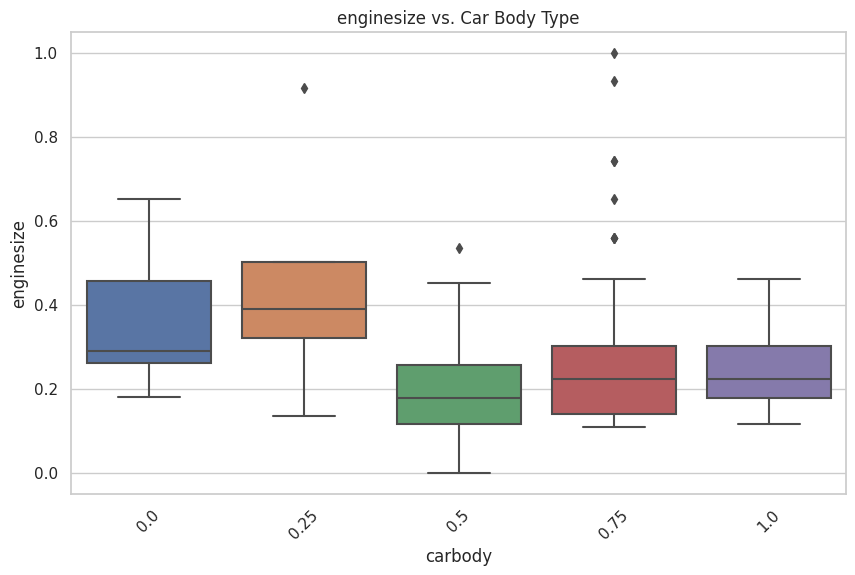

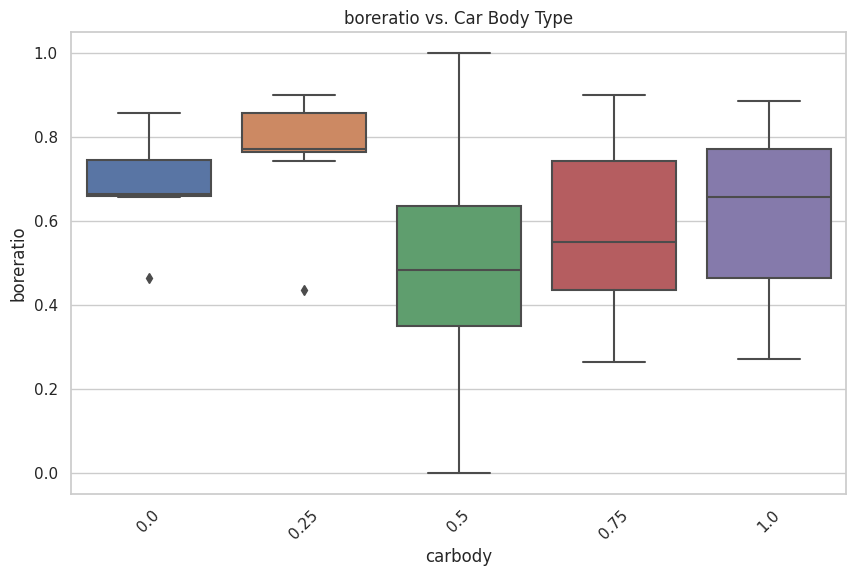

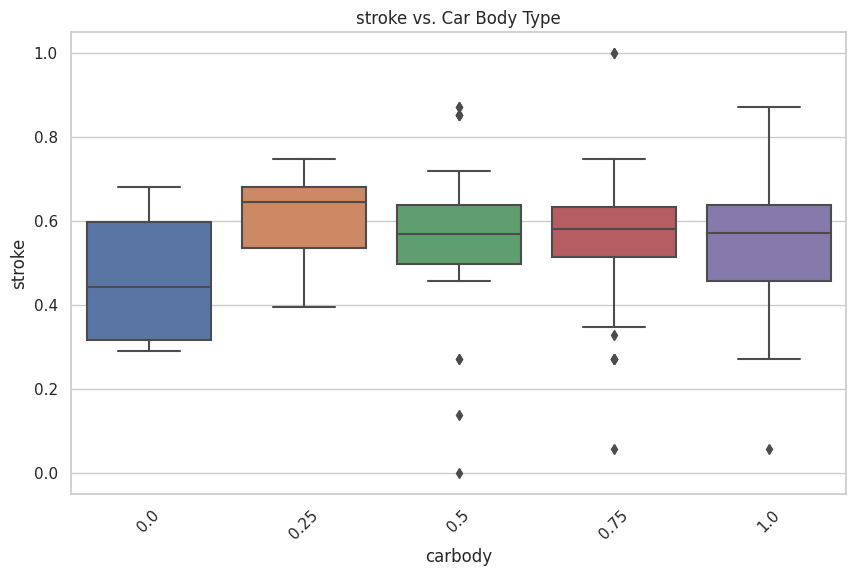

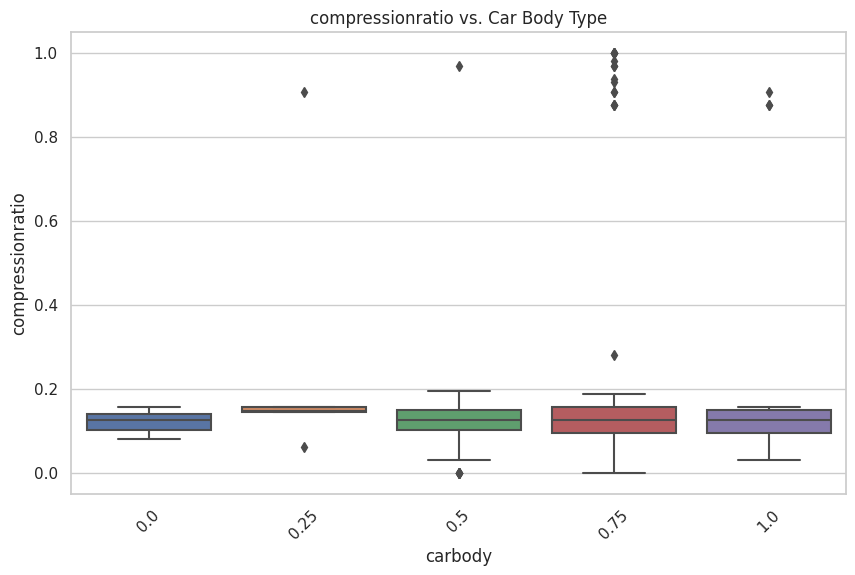

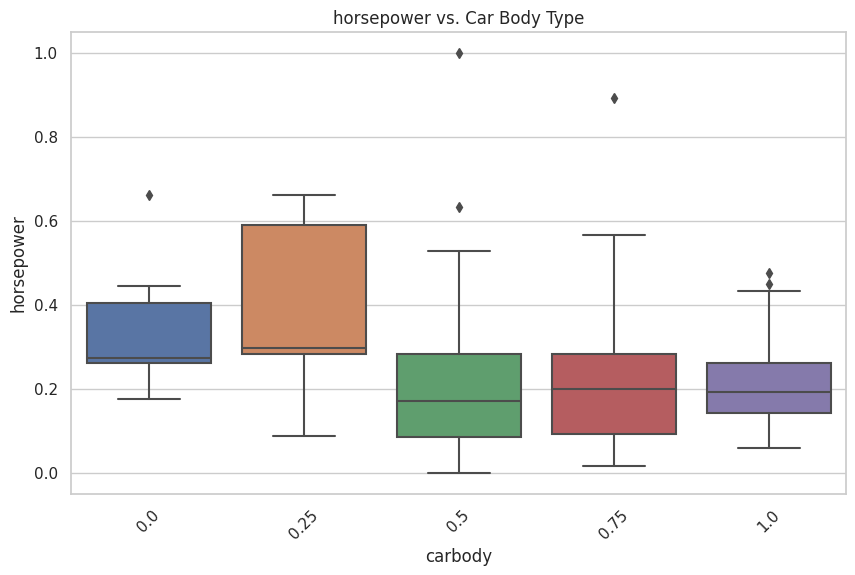

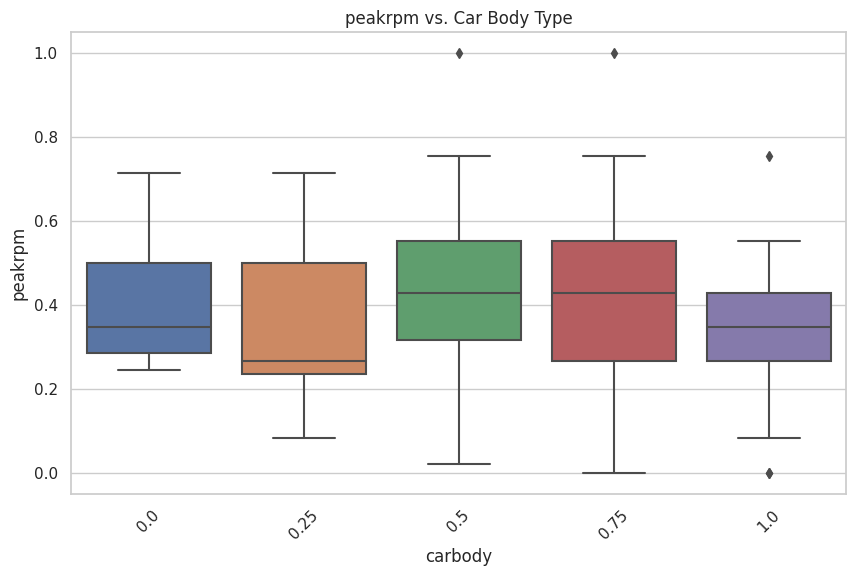

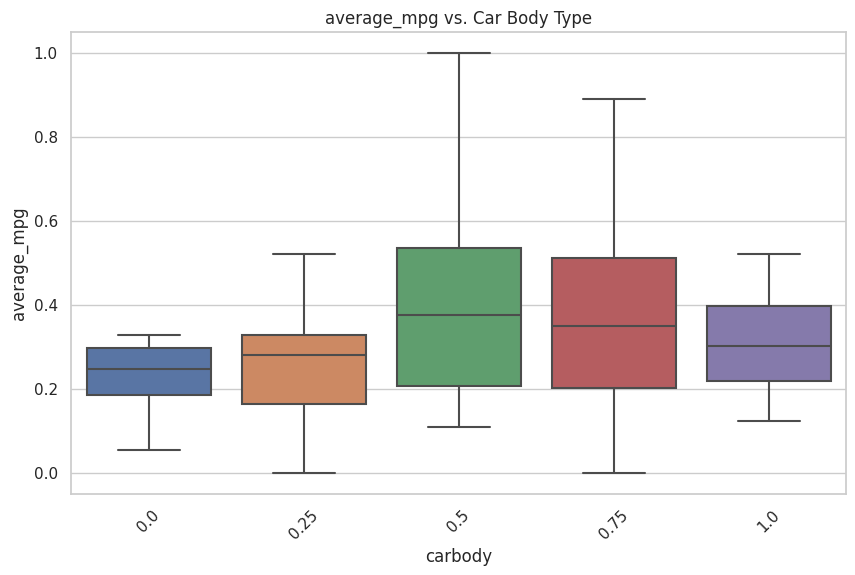

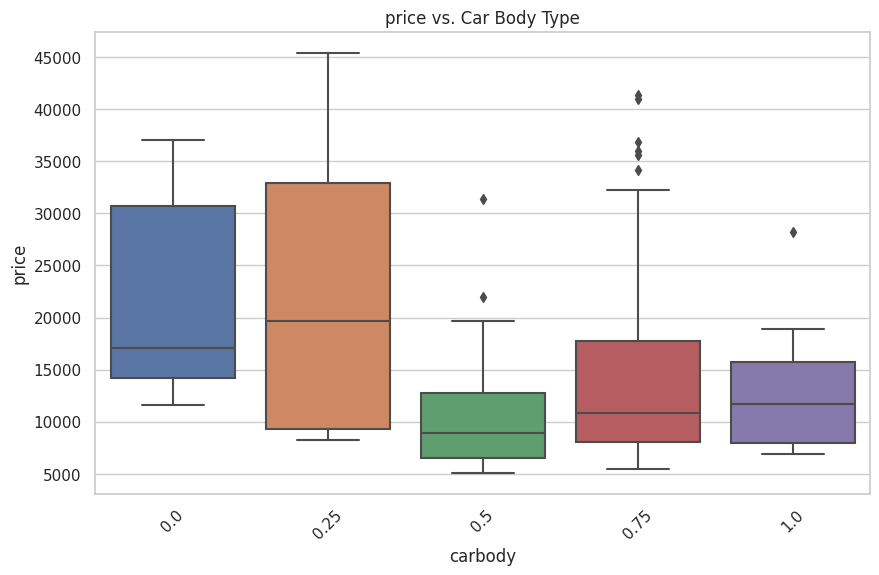

In [ ]:
# Box Plot for Numeric Columns vs. Car Body Type
numeric_columns = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'average_mpg', 'price']
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='carbody', y=column, data=data)
    plt.title(f"{column} vs. Car Body Type")
    plt.xticks(rotation=45)
    plt.show()

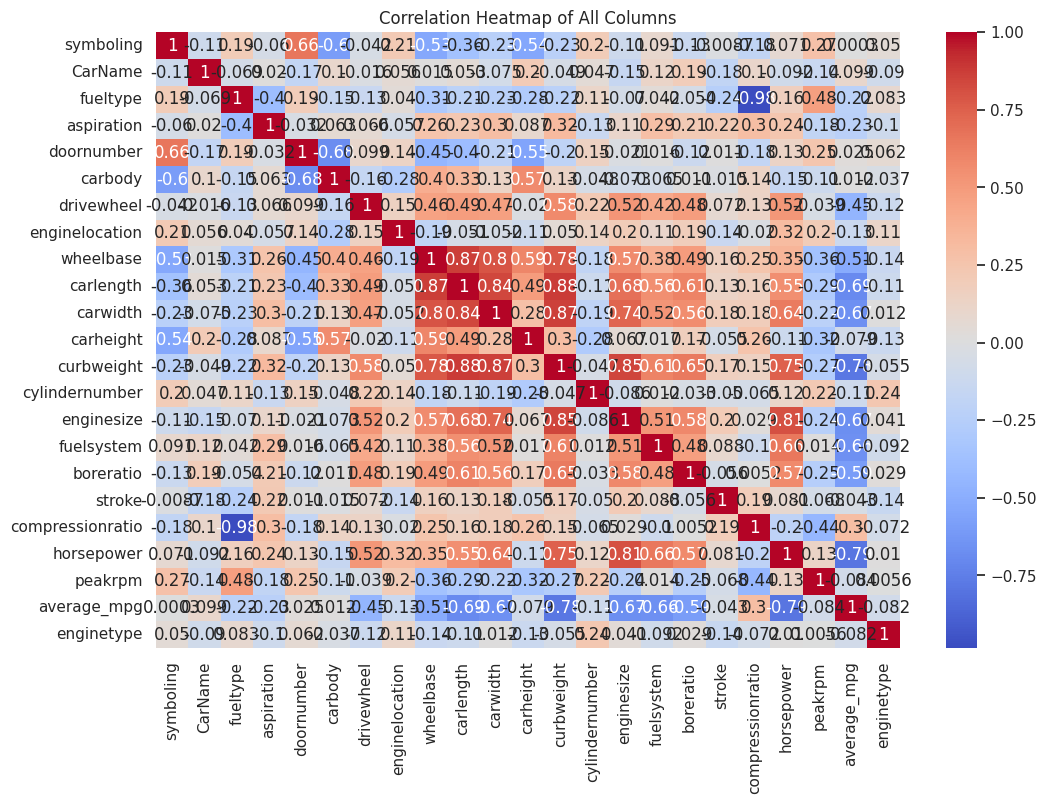

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[columns_to_normalize].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of All Columns")
plt.show()

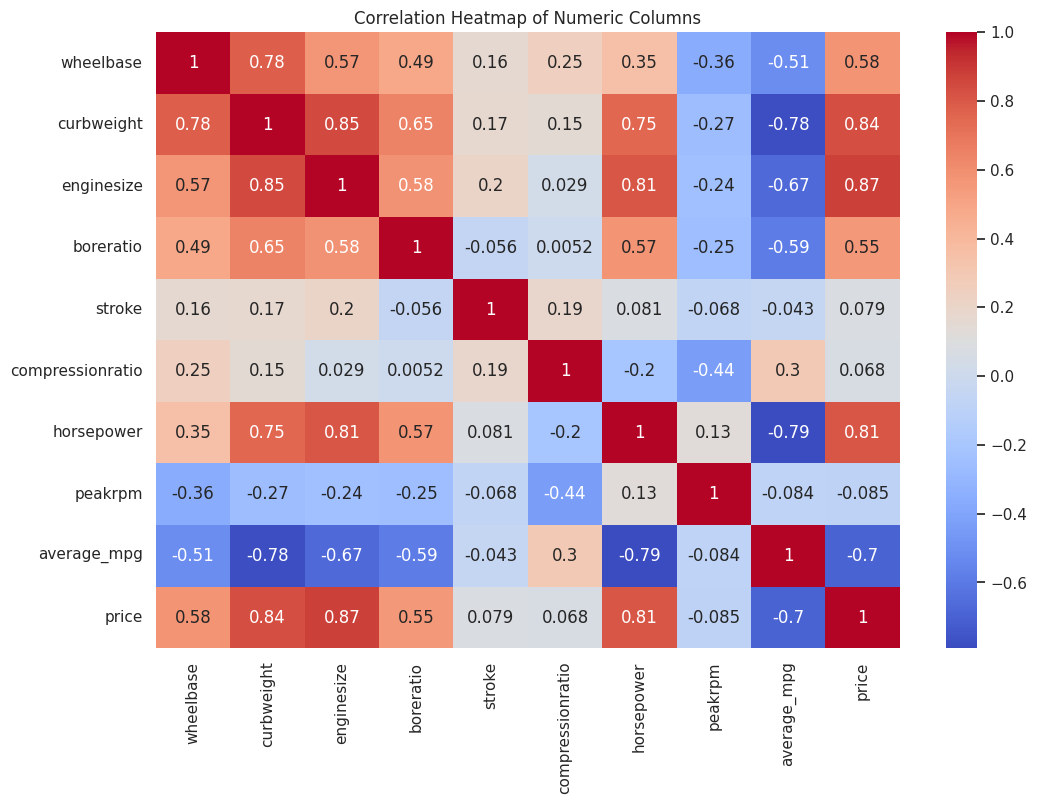

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

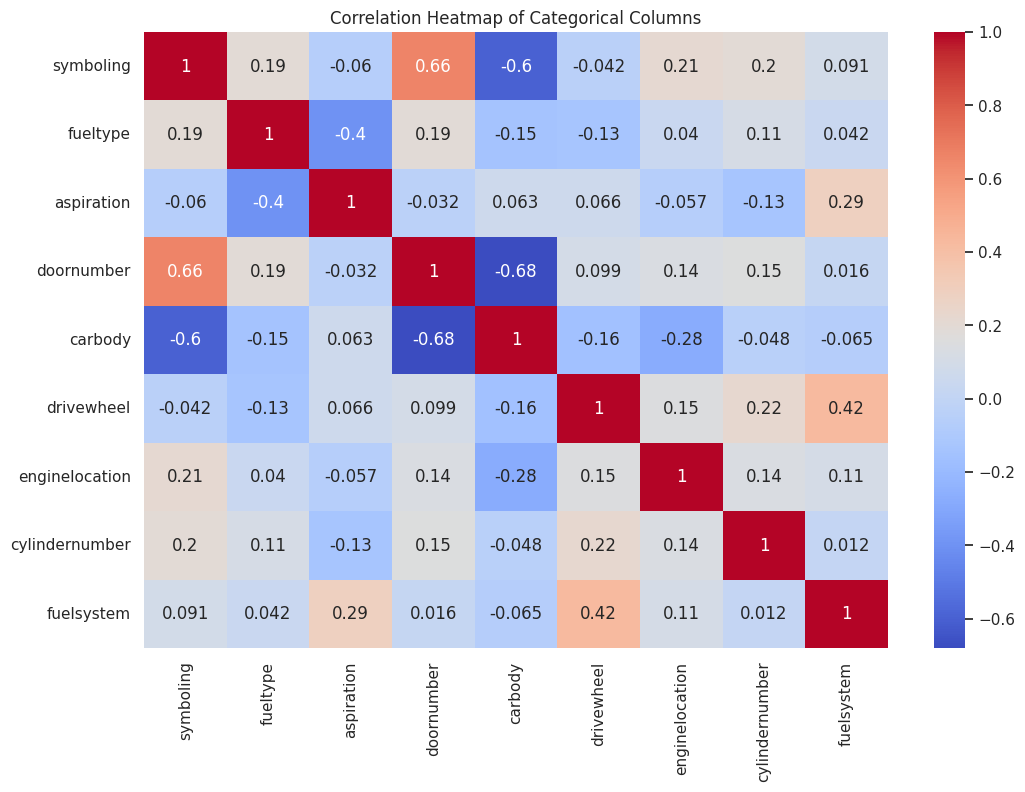

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[categorical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Categorical Columns")
plt.show()

Top 15 Most Important Features:
             Feature  Importance
15        enginesize    0.652185
12        curbweight    0.206976
22       average_mpg    0.044219
1            CarName    0.018073
20        horsepower    0.017666
10          carwidth    0.014232
9          carlength    0.007247
19  compressionratio    0.006695
8          wheelbase    0.005099
21           peakrpm    0.004609
11         carheight    0.003704
18            stroke    0.003703
17         boreratio    0.003630
16        fuelsystem    0.003449
5            carbody    0.002137


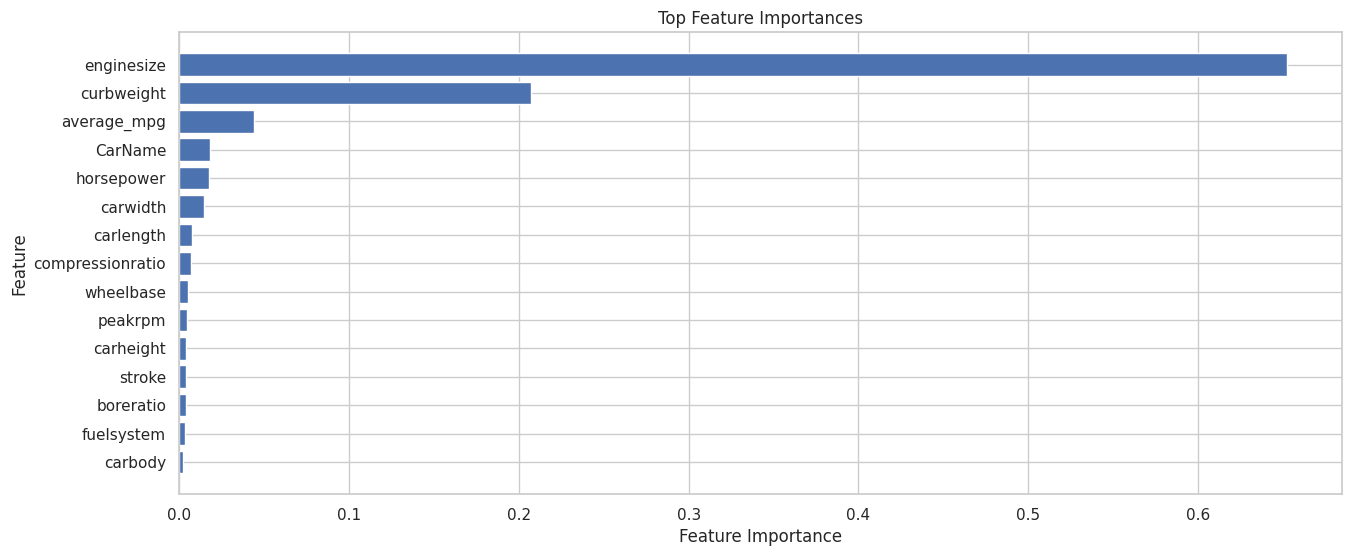

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the target variable
target_variable = 'price'

# Assuming 'data' is your DataFrame
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features (change N as needed)
top_n = 15
print(f"Top {top_n} Most Important Features:")
print(feature_importance_df.head(top_n))

# Plot feature importances
plt.figure(figsize=(15, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()


In [ ]:

columns=['enginesize','curbweight','average_mpg','CarName','horsepower','carwidth','carlength','compressionratio','wheelbase','peakrpm','carheight','stroke','boreratio','fuelsystem','carbody']
f=data.columns
for i in f:
  if i not in columns:
    print(i)


symboling
fueltype
aspiration
doornumber
drivewheel
enginelocation
enginetype
cylindernumber
price


In [ ]:
data=data.drop(columns=['symboling','fueltype','aspiration','doornumber','drivewheel','enginelocation','enginetype','cylindernumber'])

In [ ]:
data

,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,average_mpg
0,0.013699,0.00,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,13495.0,0.246575
1,0.020548,0.00,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,16500.0,0.246575
2,0.006849,0.50,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.714286,0.100000,0.666667,0.12500,0.441667,0.346939,16500.0,0.205479
3,0.027397,0.75,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.714286,0.464286,0.633333,0.18750,0.225000,0.551020,13950.0,0.328767
4,0.034247,0.75,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.714286,0.464286,0.633333,0.06250,0.279167,0.551020,17450.0,0.136986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.952055,0.75,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.714286,0.885714,0.514286,0.15625,0.275000,0.510204,16845.0,0.287671
201,0.945205,0.75,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.714286,0.885714,0.514286,0.10625,0.466667,0.469388,19045.0,0.191781
202,0.958904,0.75,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.714286,0.742857,0.380952,0.11250,0.358333,0.551020,21485.0,0.150685
203,0.972603,0.75,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.428571,0.335714,0.633333,1.00000,0.241667,0.265306,22470.0,0.315068


MODEL SELECTION AND TRAINING

1. LINEAR REGRESSION

In [ ]:
target_variable = 'price'
X = data.drop(columns=[target_variable])
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 11067935.344402608
R-squared: 0.8598002075258546


2.POLYNOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2  # You can change the degree as needed
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
polyreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = polyreg.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 81572051.97048509
R-squared: -0.03328980537783344


3.DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6592233.1122411955
R-squared: 0.9164948397765247


4.SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", mse_svr)
print("SVR R-squared:", r2_svr)


SVR Mean Squared Error: 86520369.99097757
SVR R-squared: -0.09597115813076318


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Random Forest Regression model
rf_modell = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)
